# FAST HI观测规划助手`obshelper`示例5：检查天顶角与观测时间

by astroR2 2025/5/10

* 示例5将介绍如何使用本程序包检查天顶角ZA与合适的观测日期与时间。

* 注意：本程序与FAST官方无关，纯个人开发使用，请仔细检查输出结果，如有错误概不负责。请务必先详细阅读[FAST观测常见问题](https://fast.bao.ac.cn/cms/article/147/)与[用户帮助文档](https://fast.bao.ac.cn/cms/article/80/)。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hiviewer as hv
import os

from obshelper.opt_source import OptSource
from obshelper.utils.util import line_set

from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
# 导入要检查的目标列表
df = pd.read_csv('./obsfile/M31_test_MultibeamOTF.txt', sep = '|')
df

,#Source Name,Observation Mode,RA(hh:mm:ss.ss),DEC(dd:mm:ss.s),StartRA(hh:mm:ss.ss),StartDEC(dd:mm:ss.s),EndRA(hh:mm:ss.ss),EndDEC(dd:mm:ss.s)
0,M31_test,MultiBeamOTF,00:42:44.35,+41:16:08.7,00:36:44.35,+40:43:39.3,00:48:44.35,+41:48:38.1


In [3]:
df1 = df.iloc[0]

#### Object ####
Previous Transit time: 2025-09-10 02:20:32.000
Next Transit time: 2025-09-11 02:16:36.000
#### Sun ####
Next Rise time: 2025-09-11 06:36:36.000
Previous Set time: 2025-09-10 19:02:33.000
input time at night?: True


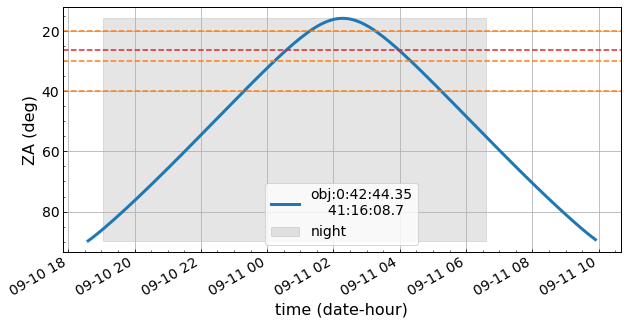

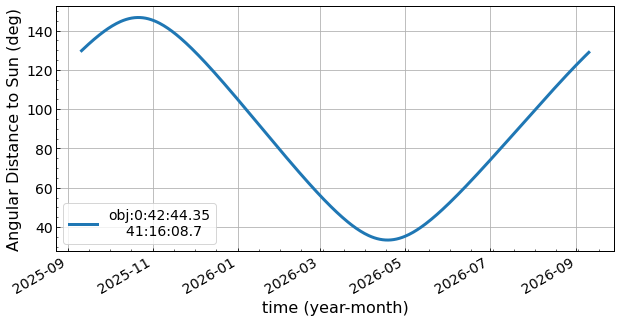

In [4]:
c = SkyCoord(df1['RA(hh:mm:ss.ss)'] + ' ' + df1['DEC(dd:mm:ss.s)'], unit = (u.hourangle, u.deg))
ra, dec = c.ra.value, c.dec.value
self = OptSource(df1['#Source Name'], ra, dec, vel = 0)

# 北京时间
BJ_time = '2025-09-10 23:00:00'
# 根据中心点画出当日ZA，ZA<26.4望远镜效率会高。夜晚观测系统温度低。
self.plot_ZA(BJ_time)

# 一年内距日角距离变化。不要距离太阳太近。同理也可以画月亮和其它行星的。
self.plot_Sun_AngleDist(BJ_time)

这里使用了Example1中的参数，随便给了观测起始时间。扫描方向与地球自转相同时，ZA不变。

MultiBeam OTF, direction:  -
Scan gap: 21.66 arcmin
Scan speed: 15.0 arcsec / s
Scan 4.0 times along -, switch 3.0 times.
Need total 3150.0 s = 52.5 min.
Sample time: 2.0 s
Rotation angle: 23.4 deg


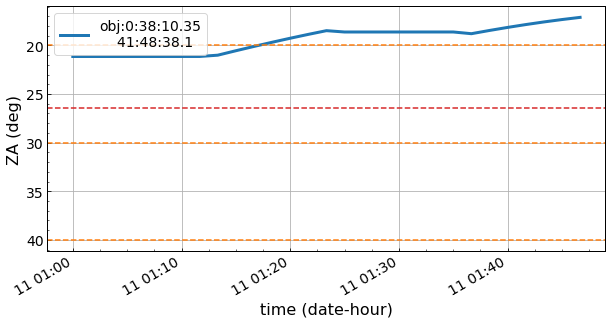

(17.117694444444453,
 <Time object: scale='utc' format='iso' value=['2025-09-11 01:46:40.000']>)

In [5]:
diff_ra = 3 * 60; diff_dec = 21.66 * 3; scan_speed = 15
# 模拟一次OTF中每个采样点的ZA，不要超过26.4度
from obshelper.MultiBeamOTF_Time import MultiOTFcalculator
otc = MultiOTFcalculator(ra, dec, diff_ra = diff_ra, diff_dec = diff_dec)
otc.get_startend()
otc.input_OTF_para(direction = '-', scan_gap = 21.66 , scan_speed = scan_speed)
otc.calculate_time()

BJ_time = '2025-09-11 01:00:00'
# 为了减少计算，不必采用真实的采样时间
t = 2
otc.footprints_M01(sample_time = t)
# 输入实际安排观测起始时间
otc.plot_ZA_in_1day(BJ_time = BJ_time, sample_time = t, gap = 50)

如果我们只做一次长条的横扫，放慢扫描速度，ZA的变化将是一条弧线。

MultiBeam OTF, direction:  -
Scan gap: 21.66 arcmin
Scan speed: 5.0 arcsec / s
Scan 1.0 times along -, switch 0.0 times.
Need total 7200.0 s = 120.0 min.
Sample time: 2.0 s
Rotation angle: 23.4 deg


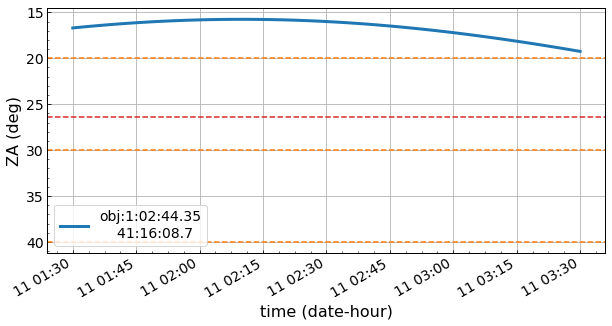

(15.754166666666663,
 <Time object: scale='utc' format='iso' value=['2025-09-11 02:10:00.000']>)

In [6]:
diff_ra = 10 * 60; diff_dec = 21.66 * 0; scan_speed = 5
# 模拟一次OTF中每个采样点的ZA，不要超过26.4度
from obshelper.MultiBeamOTF_Time import MultiOTFcalculator
otc = MultiOTFcalculator(ra, dec, diff_ra = diff_ra, diff_dec = diff_dec)
otc.get_startend()
otc.input_OTF_para(direction = '-', scan_gap = 21.66 , scan_speed = scan_speed)
otc.calculate_time()

BJ_time = '2025-09-11 01:30:00'
# 为了减少计算，不必采用真实的采样时间
t = 2
otc.footprints_M01(sample_time = t)
# 输入实际安排观测起始时间
otc.plot_ZA_in_1day(BJ_time = BJ_time, sample_time = t, gap = 50)